In [2]:
# Reddit data analysis task starter.
import html
import json
import string
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# First collect the data in json-file (follow reddit_collect_data.ipynb); specify file name here
fjson = 'raw_post_comment_data.json'

In [4]:
# read json file with collected posts and comments
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)


50

In [5]:
# data record example
data[0],data[1],data[2],data[3]

({'id': 'volh2c',
  'title': 'Monthly Entering & Transitioning into a Business Intelligence Career Thread. Questions about getting started and/or progressing towards a future in BI goes here. Refreshes on 1st: (June 30)',
  'text': "# Welcome to the 'Entering & Transitioning into a Business Intelligence career' thread!\n\nThis thread is a sticky post meant for any questions about getting started, studying, or transitioning into the Business Intelligence field. You can find the [archive of previous discussions here](https://new.reddit.com/r/BusinessIntelligence/search/?q=Weekly%20Entering%20&restrict_sr=1&sort=new).\n\nThis includes questions around learning and transitioning such as:\n\n* **Learning resources** (e.g., books, tutorials, videos)\n* **Traditional education** (e.g., schools, degrees, electives)\n* **Career questions** (e.g., resumes, applying, career prospects)\n* **Elementary questions** (e.g., where to start, what next)\n\nI ask everyone to please visit this thread often

In [6]:
# create pandas dataframe from post titles
# https://stackoverflow.com/a/43175477
df_posts = pd.DataFrame([p['title'] for p in data], columns=['title'])
df_posts


,title
0,Monthly Entering & Transitioning into a Busine...
1,Amazon offer - would you take it?
2,Data Science Salaries 2022
3,I scraped Reddit to work out how to increase D...
4,market analyst intelligence role
5,I secured my first data analyst job and I need...
6,BI Analyst salary in Toronto
7,I built an interactive dashboard using Dash an...
8,Improving my writing skills for Business Intel...
9,Using Preset as a Data Access Layer for Other ...


In [7]:
# add columns from other data fields: combine comment and sub-comment text
df_posts['post_id'] = [p['id'] for p in data]
df_posts['text'] = [p['text'] for p in data]
df_posts['comments_lev1'] = [' '.join(p['comments_lev1']) for p in data]
df_posts['comments_lev2'] = [' '.join(p['comments_lev2']) for p in data]
df_posts


,title,post_id,text,comments_lev1,comments_lev2
0,Monthly Entering & Transitioning into a Busine...,volh2c,# Welcome to the 'Entering & Transitioning int...,I'm currently in a junior product role and loo...,I don't see why not to try. Other companies be...
1,Amazon offer - would you take it?,wcp87d,"Hey BI fellows , recently got an offer from Am...","If you like your current job, I'd say stay the...",Thanks for the input So stressful week is 60 h...
2,Data Science Salaries 2022,wcl3nr,"Hi folks, I made an analysis of data science s...",One thing I would add to your charts is a sens...,"If that’s how you’re reading this, I question ..."
3,I scraped Reddit to work out how to increase D...,wc5nng,I cleaned and analyzed the data from the yearl...,"a caveat, although you're paid more in the wes...",Good point. You are right- I was trying just t...
4,market analyst intelligence role,wctw86,"Hello my friends 😊 \nI hope you're doing well,...",There may be some difference of may be no diff...,
5,I secured my first data analyst job and I need...,wbibl0,"Firstly, thank you all for all your help \^\^\...","If your company uses PowerBI, start learning P...",Why not use a public data set and try to anali...
6,BI Analyst salary in Toronto,wb8w41,"Hi guys, I am just trying to gauge the salary ...",BA ≠ BIA so you're a junior with lots of bread...,Interesting. How do you distinguish between a ...
7,I built an interactive dashboard using Dash an...,wac1br,I have a good few years' experience in data/BI...,"This is awesome, thanks for sharing Powerbi al...",Yeah I've embedded python visuals in PBI befor...
8,Improving my writing skills for Business Intel...,waczar,Im thinking through ways to improve my ability...,Rehearse rehearse rehearse.\n\nIt’s definitely...,
9,Using Preset as a Data Access Layer for Other ...,wai7fr,,,


In [8]:
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [9]:
# add clean text column with combined comments of both levels
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_posts['text_clean'] = (df_posts['text'] + df_posts['comments_lev1'] + df_posts['comments_lev2']).apply(text_cleanup)
df_posts

	

,title,post_id,text,comments_lev1,comments_lev2,text_clean
0,Monthly Entering & Transitioning into a Busine...,volh2c,# Welcome to the 'Entering & Transitioning int...,I'm currently in a junior product role and loo...,I don't see why not to try. Other companies be...,welcome transitioning business intelligence ca...
1,Amazon offer - would you take it?,wcp87d,"Hey BI fellows , recently got an offer from Am...","If you like your current job, I'd say stay the...",Thanks for the input So stressful week is 60 h...,hey bi fellows recently got offer amazon l5 bi...
2,Data Science Salaries 2022,wcl3nr,"Hi folks, I made an analysis of data science s...",One thing I would add to your charts is a sens...,"If that’s how you’re reading this, I question ...",hi folks made analysis data science salaries b...
3,I scraped Reddit to work out how to increase D...,wc5nng,I cleaned and analyzed the data from the yearl...,"a caveat, although you're paid more in the wes...",Good point. You are right- I was trying just t...,cleaned analyzed data yearly salary posts work...
4,market analyst intelligence role,wctw86,"Hello my friends 😊 \nI hope you're doing well,...",There may be some difference of may be no diff...,,hello friends hope well want know difference d...
5,I secured my first data analyst job and I need...,wbibl0,"Firstly, thank you all for all your help \^\^\...","If your company uses PowerBI, start learning P...",Why not use a public data set and try to anali...,firstly thank help self teaching sql tableau b...
6,BI Analyst salary in Toronto,wb8w41,"Hi guys, I am just trying to gauge the salary ...",BA ≠ BIA so you're a junior with lots of bread...,Interesting. How do you distinguish between a ...,hi guys trying gauge salary range would apprec...
7,I built an interactive dashboard using Dash an...,wac1br,I have a good few years' experience in data/BI...,"This is awesome, thanks for sharing Powerbi al...",Yeah I've embedded python visuals in PBI befor...,good years experience built interactive dashbo...
8,Improving my writing skills for Business Intel...,waczar,Im thinking through ways to improve my ability...,Rehearse rehearse rehearse.\n\nIt’s definitely...,,im thinking ways improve ability translate dat...
9,Using Preset as a Data Access Layer for Other ...,wai7fr,,,,


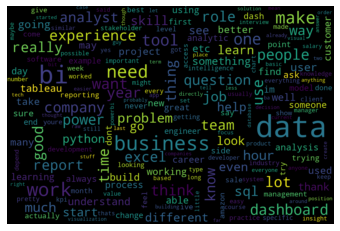

In [10]:
# most common keywords
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
text_combined = ' '.join(df_posts['text_clean'])
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(text_combined)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [11]:
# extract keyword counts
# https://stackoverflow.com/questions/60234036/python-word-count-from-wordcloud
kwords = WordCloud().process_text(text_combined)
kwords


{'welcome': 3,
 'transitioning': 6,
 'business': 117,
 'intelligence': 5,
 'career': 26,
 'thread': 9,
 'sticky': 1,
 'post': 11,
 'meant': 2,
 'getting': 22,
 'started': 16,
 'studying': 2,
 'field': 12,
 'find': 33,
 'archive': 1,
 'previous': 5,
 'around': 16,
 'learning': 32,
 'traditional': 1,
 'education': 2,
 'electives': 1,
 'applying': 7,
 'prospects': 1,
 'elementary': 1,
 'start': 42,
 'next': 10,
 'ask': 25,
 'everyone': 15,
 'please': 10,
 'visit': 2,
 'often': 14,
 'sort': 6,
 'currently': 14,
 'junior': 7,
 'product': 20,
 'role': 65,
 'looking': 22,
 'switch': 4,
 'bi': 132,
 'many': 34,
 'went': 4,
 'nowhere': 2,
 'taking': 7,
 'course': 19,
 'udemy': 8,
 'teaches': 1,
 'sql': 50,
 'python': 41,
 'tableau': 35,
 'far': 15,
 'plan': 2,
 'level': 18,
 'still': 19,
 'good': 66,
 'time': 67,
 'seeing': 5,
 'lot': 67,
 'tech': 16,
 'companies': 16,
 'massive': 2,
 'layoffs': 1,
 'possible': 20,
 'land': 4,
 'end': 18,
 'year': 50,
 'background': 14,
 'analyst': 34,
 'compan

In [12]:
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
df_kwords


,count
keyword,
welcome,3
transitioning,6
business,117
intelligence,5
career,26
...,...
fall trap,3
prepared hard,3
share update,3


<AxesSubplot:xlabel='keyword'>

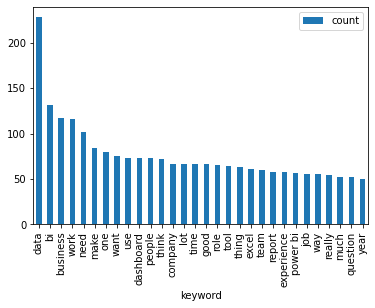

In [13]:
# plot a bar chart with the top keywords
%matplotlib inline
df_kwords.sort_values(by='count', ascending=False).head(30).plot.bar()

In [14]:
# NLTK collocations search (words occuring together): bigrams
# https://www.nltk.org/howto/collocations.html
# http://www.nltk.org/api/nltk.html#nltk.util.bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents([d.split() for d in df_posts['text_clean']])


In [15]:
# filter out bigrams occurring less than three times in the combined text
bigram_finder.apply_freq_filter(3)


In [16]:
# list of bigrams with their frequencies
bigram_freq = list(bigram_finder.ngram_fd.items())
bigram_freq

[(('transitioning', 'business'), 3),
 (('business', 'intelligence'), 16),
 (('intelligence', 'career'), 3),
 (('sql', 'python'), 3),
 (('entry', 'level'), 5),
 (('background', 'currently'), 3),
 (('business', 'analyst'), 5),
 (('1', 'year'), 4),
 (('power', 'bi'), 57),
 (('bi', 'tool'), 6),
 (('data', 'analytics'), 4),
 (('business', 'analysis'), 3),
 (('last', 'year'), 5),
 (('really', 'like'), 4),
 (('bi', 'tools'), 10),
 (('data', 'manipulation'), 4),
 (('development', 'maintenance'), 3),
 (('data', 'warehouse'), 6),
 (('data', 'engineering'), 10),
 (('tools', 'like'), 4),
 (('bi', 'developer'), 4),
 (('hello', 'everyone'), 3),
 (('want', 'get'), 3),
 (('let', 'know'), 3),
 (('data', 'engineer'), 11),
 (('data', 'analyst'), 21),
 (('analyst', 'data'), 5),
 (('analyst', 'role'), 3),
 (('job', 'description'), 3),
 (('using', 'sql'), 3),
 (('soft', 'skills'), 5),
 (('hi', 'everyone'), 3),
 (('6', 'months'), 4),
 (('wondering', 'really'), 4),
 (('would', 'go'), 4),
 (('would', 'really')

In [17]:
# collect into a pandas dataframe
df_freq = pd.DataFrame([(' '.join(k), v) for k,v in bigram_freq], columns=['keyphrase', 'count'])
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.set_index('keyphrase', inplace = True)
df_freq


,count
keyphrase,
power bi,57
data analyst,21
business intelligence,16
data engineer,11
hours week,11
...,...
big picture,3
new job,3
learn get,3


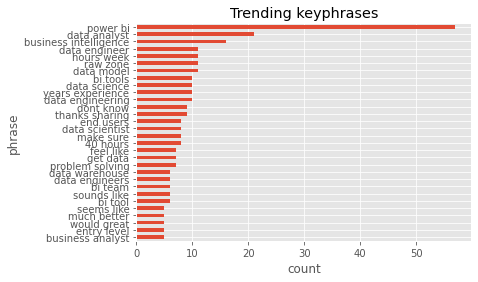

In [18]:
plt.style.use('ggplot')

# render a horizontal bar graph
df_freq.head(30).sort_values(by='count').plot(kind = 'barh')
plt.title('Trending keyphrases')
plt.ylabel('phrase')
plt.xlabel('count')
plt.legend().set_visible(False)
plt.show()
